# 4.10 - Coding Etiquette and Excel Reporting

##### Importing Libraries and Data

##### Considerations

##### Creating a new Region Tag

##### Crosstab comparing Regions with Spending Habits

##### Creating an Exclusion Flag for customers considered 'Low Activity'

##### Profiling

##### Customer Profile Aggregations

##### Visualizations

##### Regions and Departments

### Importing Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data
path = r'C:\Users\arafo\CareerFoundry\Instacart Basket Analysis'
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#### Considerations

- There is customer data in the form of First Names, Surnames, Gender, State, Age, Salaries, Number of Dependents, and Marital Status.
- These were not removed because this is a learning project, but for future projects, some of these columns may be scrubbed, possibly under the direction of a senior colleague.

### Creating a new Region Tag

In [4]:
# Creation of Regions for data
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
             'New York', 'Pennsylvania', 'New Jersey']

midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
           'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 
            'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
           'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [5]:
# Empty list for looping
result = []

# For loop to fill in empty list
for value in ords_prods_customers['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')

In [6]:
# Creating new column
ords_prods_customers['region'] = result

In [7]:
# Counting regions
ords_prods_customers['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [8]:
ords_prods_customers.head(5)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


### Crosstab comparing Regions with Spending Habits

In [9]:
# Determining if there is a difference in spending habits
crosstab = pd.crosstab(ords_prods_customers['region'], ords_prods_customers['spender_flag'], dropna = False)

In [10]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Each region has very few "high spenders" compared to "low spenders".

### Creating an Exclusion Flag for customers considered 'Low Activity'

In [11]:
# Exclusion Flag for low-activity customers
# Creating a activity flag
ords_prods_customers.loc[ords_prods_customers['max_order'] > 5, 'activity_flag'] = 'High Activity'
ords_prods_customers.loc[ords_prods_customers['max_order'] <= 5, 'activity_flag'] = 'Low Activity'

In [12]:
ords_prods_customers['activity_flag'].value_counts()

High Activity    30171424
Low Activity      2233435
Name: activity_flag, dtype: int64

In [13]:
# Subsetting high activity customers
df_high_activity = ords_prods_customers[ords_prods_customers['activity_flag'] == 'High Activity']

In [14]:
# Subsetting Low activity customers
df_low_activity = ords_prods_customers[ords_prods_customers['activity_flag'] == 'Low Activity']

In [15]:
df_high_activity.shape

(30171424, 35)

In [16]:
df_low_activity.shape

(2233435, 35)

In [17]:
# Exporting Low activity data set
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity.pkl'))

# Profiling

#### Age Profiling
 - Youth Categorized as 24 and Under
 - Adults categorized as 25 to 64
 - Elders categorized as 65+

In [18]:
df_high_activity.loc[(df_high_activity['age'] <= 24),'age_group'] = 'Youth'

C:\Users\arafo\AppData\Local\Temp\ipykernel_16568\4210594907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['age'] <= 24),'age_group'] = 'Youth'


In [19]:
df_high_activity.loc[(df_high_activity['age'] <= 64) & (df_high_activity['age'] > 24), 'age_group'] = 'Adult'

In [20]:
df_high_activity.loc[df_high_activity['age'] > 64,'age_group'] = 'Elder'

In [21]:
df_high_activity['age_group'].value_counts()

Adult    18854496
Elder     7989725
Youth     3327203
Name: age_group, dtype: int64

In [22]:
age_regions = pd.crosstab(df_high_activity['region'], df_high_activity['age_group'], dropna = False)

In [23]:
age_regions

age_group,Adult,Elder,Youth
region,,,
Midwest,4445189,1852712,772221
Northeast,3290990,1447334,586027
South,6273568,2641370,1135221
West,4844749,2048309,833734


#### Income Profiling
 - Income less than 100,000 = Low Income
 - Income between 100,000 and 199,999 = Lower Middle Income
 - Income between 200,000 and 299,999 = Upper Middle Income
 - Income over 300,000 = High Income
 

In [24]:
df_high_activity.loc[(df_high_activity['income'] < 100000),'income_profile'] = 'Low Income'

C:\Users\arafo\AppData\Local\Temp\ipykernel_16568\1355838035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['income'] < 100000),'income_profile'] = 'Low Income'


In [25]:
df_high_activity.loc[(df_high_activity['income'] >= 100000) & (df_high_activity['income'] < 200000), 'income_profile'] = 'Lower Middle Income'

In [26]:
df_high_activity.loc[(df_high_activity['income'] >= 200000) & (df_high_activity['income'] < 300000), 'income_profile'] = 'Upper Middle Income'

In [27]:
df_high_activity.loc[(df_high_activity['income'] >= 300000),'income_profile'] = 'High Income'

In [28]:
df_high_activity['income_profile'].value_counts()

Low Income             16307405
Lower Middle Income    13613661
Upper Middle Income      151334
High Income               99024
Name: income_profile, dtype: int64

In [29]:
income_regions = pd.crosstab(df_high_activity['income_profile'], df_high_activity['region'], dropna = False)

In [30]:
income_regions

region,Midwest,Northeast,South,West
income_profile,,,,
High Income,30421,15245,31285,22073
Low Income,3754606,2867139,5497375,4188285
Lower Middle Income,3251972,2417796,4470313,3473580
Upper Middle Income,33123,24171,51186,42854


#### Family Profiling
 - Department ID 18 is classified as "babies"
 - It can be inferred that a family that has dependents and has purchased items for babies has a young children.
 - It can also be inferred that a family that has dependents but has not purchased items for babies has older children.

In [31]:
# Import department IDs
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [32]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [33]:
# Rename Unnamed: 0 column to department_id
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [34]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
dept_dict = df_dept.set_index('department_id').to_dict()['department']

In [36]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [37]:
# 12 is used for .head() because there are 3 different product_ids at index # 9, 10, and 11
df_high_activity.head(12)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_group,income_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income


In [38]:
df_high_activity['department'] = df_high_activity['department_id'].map(dept_dict)

C:\Users\arafo\AppData\Local\Temp\ipykernel_16568\1306079726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity['department'] = df_high_activity['department_id'].map(dept_dict)


In [39]:
df_high_activity.head(12)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_group,income_profile,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages


In [40]:
df_high_activity.loc[(df_high_activity['num_of_dependents'] > 0) & (df_high_activity['department'] == 'babies' ), 'family_profile'] = 'Younger Children'

C:\Users\arafo\AppData\Local\Temp\ipykernel_16568\1440286942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['num_of_dependents'] > 0) & (df_high_activity['department'] == 'babies' ), 'family_profile'] = 'Younger Children'


In [41]:
df_high_activity.loc[(df_high_activity['num_of_dependents'] > 0) & (df_high_activity['department'] != 'babies' ), 'family_profile'] = 'Older Children'

In [42]:
df_high_activity.loc[(df_high_activity['num_of_dependents'] == 0),'family_profile'] = 'No Children'

In [43]:
df_high_activity['family_profile'].value_counts()

Older Children      22330558
No Children          7539213
Younger Children      301653
Name: family_profile, dtype: int64

In [44]:
family_regions = pd.crosstab(df_high_activity['family_profile'], df_high_activity['region'], dropna = False)

In [45]:
family_regions

region,Midwest,Northeast,South,West
family_profile,,,,
No Children,1773970,1317139,2516780,1931324
Older Children,5226303,3953571,7431031,5719653
Younger Children,69849,53641,102348,75815


#### Dependents Profiling
 - Based on number of dependents
 - 0 Dependents means a single or couple
 - 1-2 Dependents means a small family
 - 3+ Dependents means a large family

In [46]:
df_high_activity['num_of_dependents'].value_counts()

3    7576814
0    7539213
2    7531754
1    7523643
Name: num_of_dependents, dtype: int64

In [47]:
df_high_activity.loc[(df_high_activity['num_of_dependents'] == 0),'family_size'] = 'Single or Couple'

C:\Users\arafo\AppData\Local\Temp\ipykernel_16568\3243417396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['num_of_dependents'] == 0),'family_size'] = 'Single or Couple'


In [48]:
df_high_activity.loc[(df_high_activity['num_of_dependents'] >= 1) & (df_high_activity['num_of_dependents'] <= 2), 'family_size'] = 'Small Family'

In [49]:
df_high_activity.loc[(df_high_activity['num_of_dependents'] > 2),'family_size'] = 'Large Family'

In [50]:
df_high_activity['family_size'].value_counts()

Small Family        15055397
Large Family         7576814
Single or Couple     7539213
Name: family_size, dtype: int64

In [51]:
df_high_activity.tail(100)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_group,income_profile,department,family_profile,family_size
32404609,1963014,124817,6,0,20,30.0,False,34588,1,1,Double Chocolate Soft Baked Cookies,61,19,4.0,Low-range product,Busiest Day,Busiest Day,Average Orders,8,New customer,6.147619,Low spender,15.0,Regular customer,Diana,Hansen,Female,Maine,68,9/5/2019,0,divorced/widowed,45764,Northeast,High Activity,Elder,Low Income,snacks,No Children,Single or Couple
32404610,591124,124817,7,5,8,12.0,False,34588,1,1,Double Chocolate Soft Baked Cookies,61,19,4.0,Low-range product,Regularly busy,Regularly busy,Average Orders,8,New customer,6.147619,Low spender,15.0,Regular customer,Diana,Hansen,Female,Maine,68,9/5/2019,0,divorced/widowed,45764,Northeast,High Activity,Elder,Low Income,snacks,No Children,Single or Couple
32404611,1603097,124817,8,6,18,15.0,False,34588,1,1,Double Chocolate Soft Baked Cookies,61,19,4.0,Low-range product,Regularly busy,Regularly busy,Average Orders,8,New customer,6.147619,Low spender,15.0,Regular customer,Diana,Hansen,Female,Maine,68,9/5/2019,0,divorced/widowed,45764,Northeast,High Activity,Elder,Low Income,snacks,No Children,Single or Couple
32404643,563928,187628,1,5,9,NaN,True,34148,1,0,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Regularly busy,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activity,Adult,Low Income,beverages,Older Children,Large Family
32404644,3157922,187628,2,5,9,14.0,False,34148,1,1,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Regularly busy,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activity,Adult,Low Income,beverages,Older Children,Large Family
32404645,2215193,187628,3,2,9,4.0,False,34148,1,1,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Regularly busy,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activity,Adult,Low Income,beverages,Older Children,Large Family
32404646,1516321,187628,4,2,10,0.0,False,34148,1,1,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Regularly busy,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activity,Adult,Low Income,beverages,Older Children,Large Family
32404647,688505,187628,5,5,11,3.0,False,34148,1,1,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Regularly busy,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activity,Adult,Low Income,beverages,Older Children,Large Family
32404648,1185993,187628,6,3,9,26.0,False,34148,1,1,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Slowest Day,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activity,Adult,Low Income,beverages,Older Children,Large Family
32404649,1908852,187628,7,1,11,30.0,False,34148,1,1,Variety of Anitoxidant Infusions Cans,64,7,9.5,Mid-range product,Regularly busy,Busiest Day,Most Orders,16,Regular customer,9.500000,Low spender,7.0,Frequent Customer,Alan,Davidson,Male,Wisconsin,26,7/5/2019,3,married,85887,Midwest,High Activi

In [52]:
family_crosstab = pd.crosstab(df_high_activity['family_profile'], df_high_activity['family_size'], dropna = False)

In [53]:
family_crosstab

family_size,Large Family,Single or Couple,Small Family
family_profile,,,
No Children,0,7539213,0
Older Children,7475971,0,14854587
Younger Children,100843,0,200810


# Customer Profile Aggregations

In [54]:
# Aggregation of age_groups and usage frequency
df_high_activity.groupby('age_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                   mean  min   max
age_group                                         
Adult                          9.722825  0.0  30.0
Elder                          9.688458  0.0  30.0
Youth                          9.664696  0.0  30.0

In [55]:
# Aggregation of age_groups and expenditures
df_high_activity.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
age_group                         
Adult      11.834841  1.0  99999.0
Elder      11.683091  1.0  99999.0
Youth      12.409317  1.0  99999.0

In [56]:
# Aggregation of income_profile and usage frequency
df_high_activity.groupby('income_profile').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                             mean  min   max
income_profile                                              
High Income                              9.010558  1.0  30.0
Low Income                               9.760103  0.0  30.0
Lower Middle Income                      9.659003  0.0  30.0
Upper Middle Income                      8.820866  1.0  30.0

In [57]:
# Aggregation of income_profile and expenditures
df_high_activity.groupby('income_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                           mean  min      max
income_profile                               
High Income          260.558652  1.0  99999.0
Low Income             8.099410  1.0  99999.0
Lower Middle Income   12.041896  1.0  99999.0
Upper Middle Income  237.598637  1.0  99999.0

In [58]:
# Aggregation of family_profile and usage frequency
df_high_activity.groupby('family_profile').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                          mean  min   max
family_profile                                           
No Children                           9.680553  0.0  30.0
Older Children                        9.731792  0.0  30.0
Younger Children                      8.564158  0.0  30.0

In [59]:
# Aggregation of family_profile and expenditures
df_high_activity.groupby('family_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
family_profile                           
No Children       12.081944  1.0  99999.0
Older Children    11.839328  1.0  99999.0
Younger Children   7.643898  1.0     15.0

In [60]:
# Aggregation of family_size and usage frequency
df_high_activity.groupby('family_size').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                          mean  min   max
family_size                                              
Large Family                          9.701836  0.0  30.0
Single or Couple                      9.680553  0.0  30.0
Small Family                          9.723472  0.0  30.0

In [61]:
# Aggregation of family_size and expenditures
df_high_activity.groupby('family_size').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
family_size                              
Large Family      11.711564  1.0  99999.0
Single or Couple  12.081944  1.0  99999.0
Small Family      11.819567  1.0  99999.0

# Visualizations

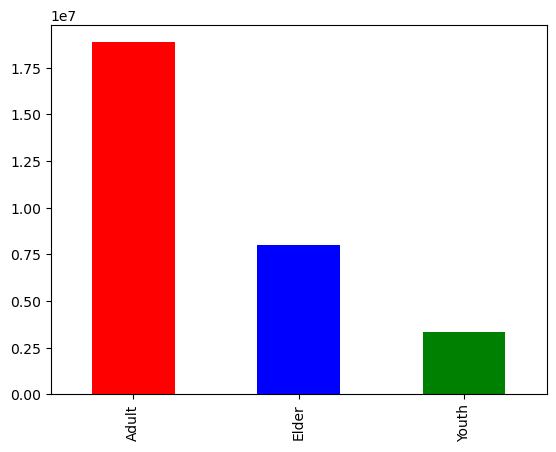

In [62]:
# Visualization of age groups
bar_age_groups = df_high_activity['age_group'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

- The bar chart shows that a much larger portion of the data population consists of adults, people between the ages of 25 - 64.

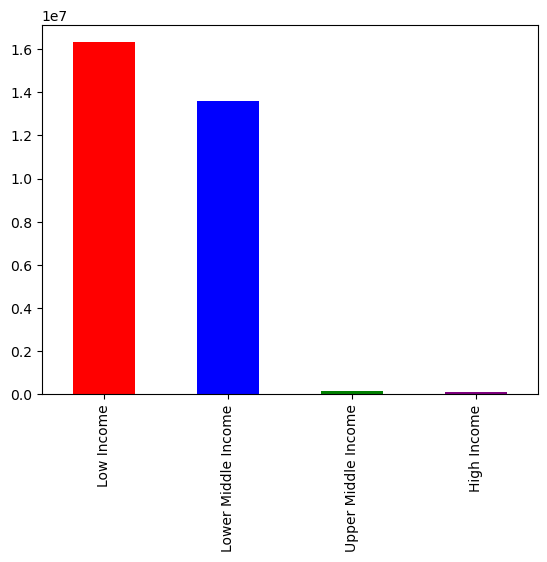

In [63]:
# Visualization of number of customers in an income group
bar_customer_income_groups = df_high_activity['income_profile'].value_counts().plot.bar(color = ['red', 'blue', 'green', 'purple'])

 - This bar chart shows that the number of customers classified as low income and lower middle income greatly outnumber those that are in the higher income brackets.

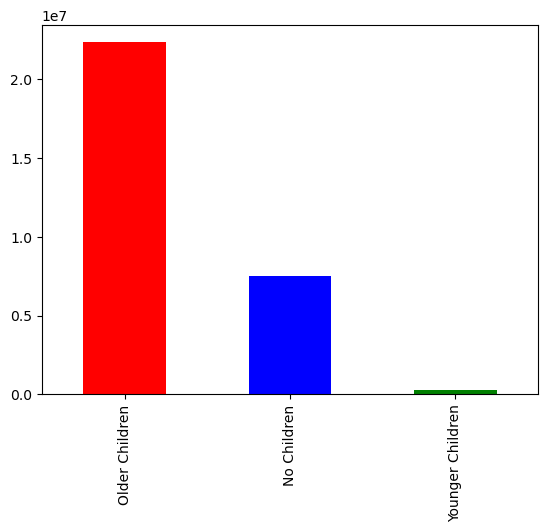

In [64]:
# Visualization of number of customers by family_profile
bar_family_profiles = df_high_activity['family_profile'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

- This bar chart shows that a large portion of the data population have dependents, but do not purchase from the 'babies' category.

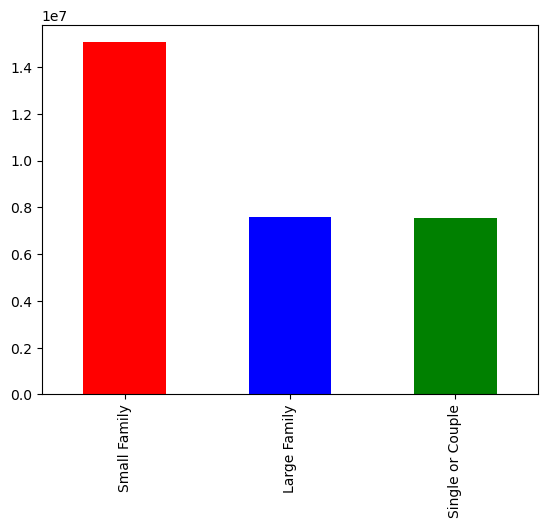

In [65]:
# Visualization of customers by Family Size
bar_family_sizes = df_high_activity['family_size'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

- This bar chart shows that the Small Family profile is about twice as large as the Large Family and Single/Couple profiles. 

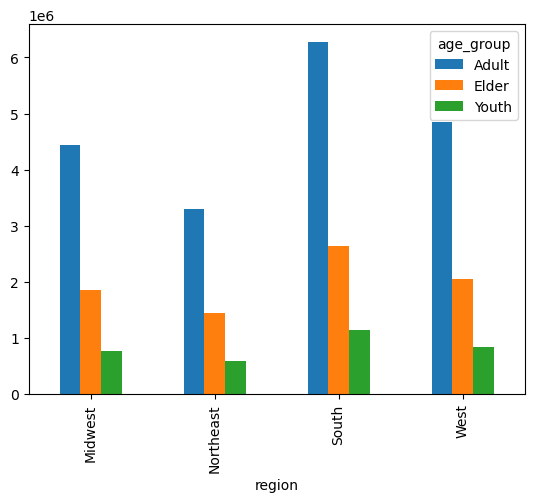

In [66]:
# Visualization of a comparison of Age Grops by Regions
bar_age_regions = age_regions.plot.bar()

In [67]:
# Exporting visualizations

In [68]:
bar_age_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_groups.png'))

In [69]:
bar_customer_income_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_income_groups.png'))

In [70]:
bar_family_profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_profiles.png'))

In [71]:
bar_family_sizes.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_sizes.png'))

In [72]:
bar_age_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_regions.png'))

# Regions and Departments

In [73]:
# Crosstab of departments and regions
ct_depts_regions = pd.crosstab(df_high_activity['department'], df_high_activity['region'], dropna = False)

In [74]:
ct_depts_regions

region,Midwest,Northeast,South,West
department,,,,
alcohol,32883,24114,47069,35507
babies,94027,71370,136961,100708
bakery,255082,194076,362204,281126
beverages,583228,451674,837788,634551
breakfast,151846,114701,217548,169324
bulk,7806,5482,10953,8600
canned goods,230173,171517,327746,252605
dairy eggs,1182974,892624,1682429,1295413
deli,228200,173837,325082,250931


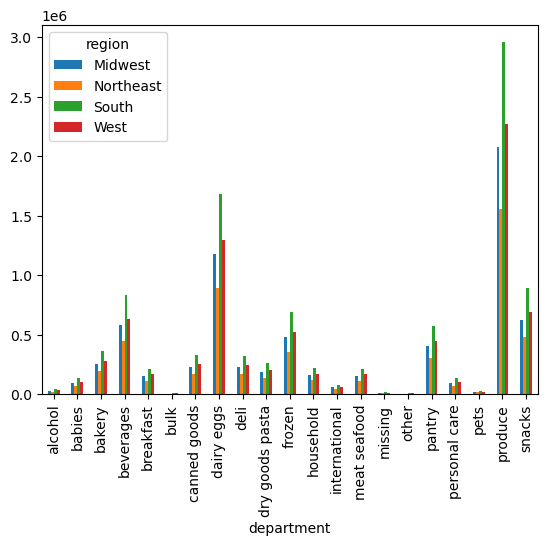

In [75]:
bar_ct_dept_regions = ct_depts_regions.plot.bar()

- At a glance, we can see Produce dominates the amount of sales, followed by dairy eggs, snacks, and beverages.
- We can also see that the South region has the most sales, followed by the West, the Midwest, and finally the Northeast.

In [76]:
# Exporting chart
bar_ct_dept_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ct_dept_regions.png'))

In [77]:
# Comparing family sizes based on regions
ct_familysize_regions = pd.crosstab(df_high_activity['region'], df_high_activity['family_size'], dropna = False)

In [78]:
ct_familysize_regions

family_size,Large Family,Single or Couple,Small Family
region,,,
Midwest,1738732,1773970,3557420
Northeast,1347651,1317139,2659561
South,2521069,2516780,5012310
West,1969362,1931324,3826106


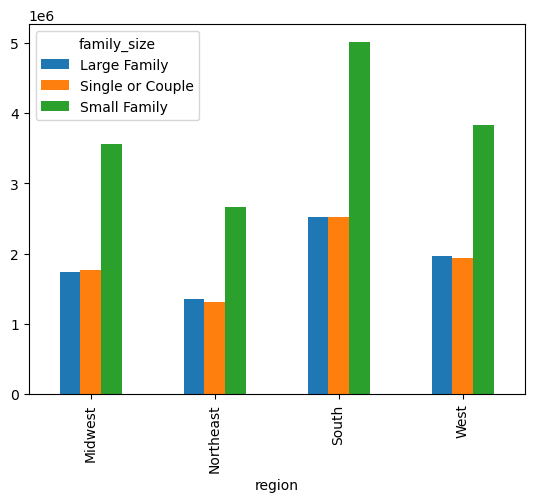

In [79]:
bar_familysize_regions = ct_familysize_regions.plot.bar()

- Here we can see that the Small Family, or a family with at most 2 dependents, is the most common.
- The Single/Couple family and the Large Family, or a family with more than 2 dependents, are fairly even, with the large family taking a slight lead.
- We can see here that the South region has the most amount of families, followed closely by the West and Midwest regions.

In [80]:
# Exporting chart
bar_familysize_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ct_familysize_regions.png'))

In [81]:
# pulling from previous comparison between regions and incomes
income_regions

region,Midwest,Northeast,South,West
income_profile,,,,
High Income,30421,15245,31285,22073
Low Income,3754606,2867139,5497375,4188285
Lower Middle Income,3251972,2417796,4470313,3473580
Upper Middle Income,33123,24171,51186,42854


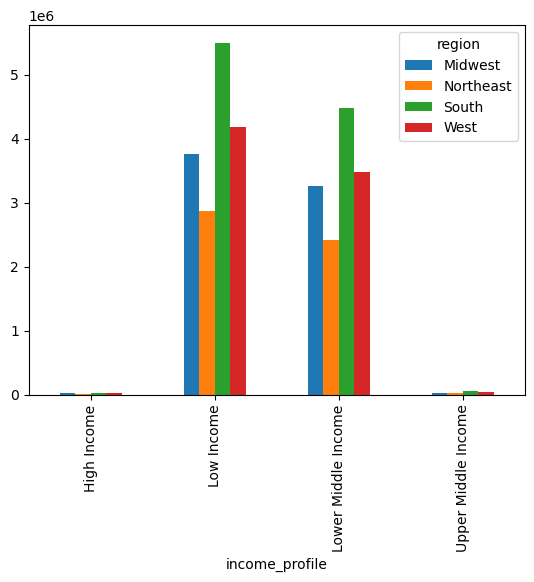

In [82]:
bar_income_regions = income_regions.plot.bar()

- We can see here that a majority of the individuals in the database are under the Low Income profile, meaning they have an income of less than 100,000.
- This group is followed by those in the Lower Middle Income profile, for an income between 100,000 and 199,999.
- Again, we see that the South region has the most amount of people in the Low and Lower Middle income profiles, followed by the West, and the Midwest regions.

In [83]:
# Exporting chart
bar_income_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_regions.png'))

In [84]:
ct_department_frequency = pd.crosstab(df_high_activity['department'], df_high_activity['frequency_flag'], dropna = False)

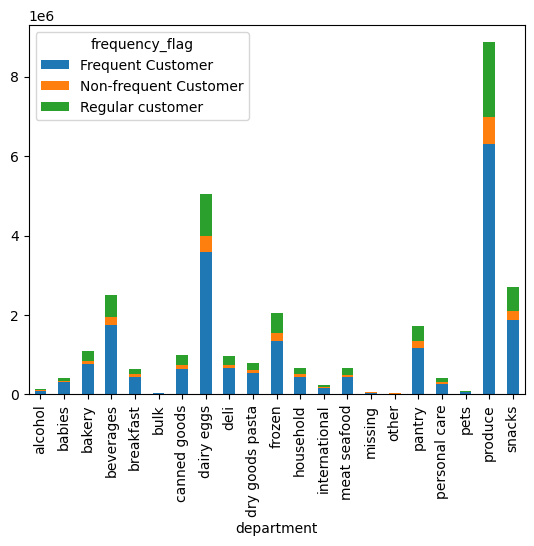

In [85]:
bar_department_frequency = ct_department_frequency.plot.bar(stacked = True)

- A Stacked bar chart depicting the amount of purchases in each department based on how frequently Instacart is used per person.
- We see a majority of users, regardless of frequency status, purchase Produce the most. This is followed by Dairy Eggs, Beverages, Snacks, and the Frozen categories.
- The amount of Produce purchases by Frequenct customers by itself is more than the second highest department, Dairy Eggs, with all three frequency flags combined.

In [86]:
# Exporting chart
bar_department_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_frequency.png'))

In [87]:
ct_department_agegroup = pd.crosstab(df_high_activity['department'], df_high_activity['age_group'], dropna = False)

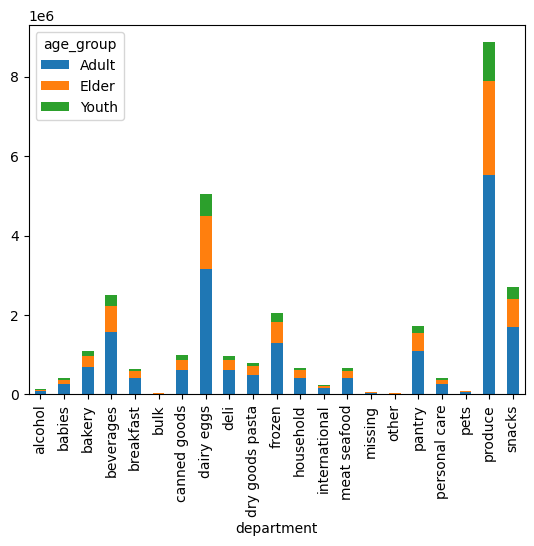

In [88]:
bar_department_agegroup = ct_department_agegroup.plot.bar(stacked = True)

- A stacked bar chart of orders based on the number of orders per department based on age groups.
- Adults, or people between the ages of 25 and 64, purchase the most, followed by Elders, or people over the age of 64, and then the Youth, or people under the age of 25.
- All three groups purchase similarly, with the most purchases going towards Produce, followed by dairy eggs, snacks, beverages, and the frozen categories.

In [89]:
# Exporting chart
bar_department_agegroup.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_agegroup.png'))

In [90]:
ct_department_family_size = pd.crosstab(df_high_activity['department'], df_high_activity['family_size'], dropna = False)

In [91]:
ct_department_family_size

family_size,Large Family,Single or Couple,Small Family
department,,,
alcohol,36077,35469,68027
babies,100843,101413,200810
bakery,272867,274097,545524
beverages,624908,629177,1253156
breakfast,163059,161907,328453
bulk,8239,7835,16767
canned goods,247830,243608,490603
dairy eggs,1265543,1263404,2524493
deli,246247,246664,485139


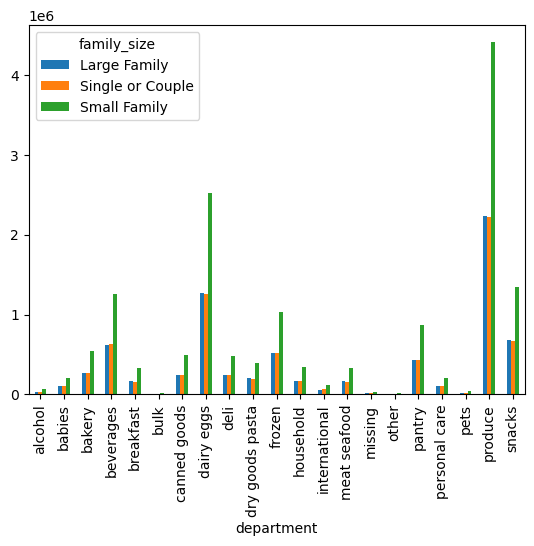

In [92]:
bar_department_family_size = ct_department_family_size.plot.bar()

- A bar chart depicting family size compared to departments.
- Small family overwhelming orders the most in every category.
- Singles/Couples order more beverages in the top 5 categories when compared to the Large Family.

In [93]:
# Exporting chart
bar_department_family_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_family_size.png'))

In [94]:
# Export data
df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','01-2023_final_dataset.pkl'))